In [ ]:
import pandas as pd

pos = pd.read_csv('./data/20190509_mask_POS.csv')

In [ ]:
pos.head()

,CUSTOMER NAME,Calendar Day일 2,POS Category Code,UPC,품목명,Manufacturer,Sales Amt,Sales (Bag),Sales SU,Unit Price,박스입수,구분,유통사,SUB-CTG,수량(CS),금액,가격,지역,구군
0,(주)지에스리테일 본부,2017-01-01,MP,8.801166e+12,CNX 황사마스크 대형1P,UKM Company,49000.0,27,27.0,1815.0,50,POS,(주)지에스리테일 본부,MP,0.5,49000,1815,경기도,평택시
1,(주)지에스리테일 본부,2017-01-01,MG,8.801166e+12,UKM 크리넥스 입체마스크 성인용 3P 6G x 3EA,UKM Company,84000.0,28,0.0,3000.0,50,POS,(주)지에스리테일 본부,MG,0.6,84000,3000,경기도,평택시
2,(주)지에스리테일 본부,2017-01-01,MG,8.801166e+12,UKM 크리넥스 입체마스크 어린이용 3P 6Gx3EA,UKM Company,57000.0,20,0.0,2850.0,50,POS,(주)지에스리테일 본부,MG,0.4,57000,2850,경기도,평택시
3,(주)지에스리테일 본부,2017-01-01,MG,8.801166e+12,CNX 황사마스크 성인용3P,UKM Company,2600.0,1,1.0,2600.0,50,POS,(주)지에스리테일 본부,MG,0.0,2600,2600,경기도,포천시
4,(주)지에스리테일 본부,2017-01-01,MP,8.801166e+12,CNX KF94 방역용 마스크 1입,UKM Company,5000.0,2,2.0,2500.0,50,POS,(주)지에스리테일 본부,MP,0.0,5000,2500,경기도,포천시


In [ ]:
pos.columns

Index(['CUSTOMER NAME', 'Calendar Day일 2', 'POS Category Code', 'UPC', '품목명',
       'Manufacturer', 'Sales Amt', 'Sales (Bag)', 'Sales SU', 'Unit Price',
       '박스입수', '구분', '유통사', 'SUB-CTG', '수량(CS)', '금액', '가격', '지역', '구군'],
      dtype='object')

In [ ]:
pos['CUSTOMER NAME'].unique()

array(['(주)지에스리테일 본부', '롯데마트 온라인몰', '롯데쇼핑㈜ 롯데마트', '롯데쇼핑㈜롯데슈퍼사업부',
       '㈜신세계 이마트부문', '쿠팡', '홈플러스테스코(주)', '홈플러스(주)', '씨에스유통㈜'],
      dtype=object)

In [ ]:
pos['Calendar Day일 2'] = pd.to_datetime(pos['Calendar Day일 2'], format = '%Y-%m-%d')

In [ ]:
pos['Calendar Day일 2'].head()

0   2017-01-01
1   2017-01-01
2   2017-01-01
3   2017-01-01
4   2017-01-01
Name: Calendar Day일 2, dtype: datetime64[ns]

In [ ]:
pos['Calendar Day일 2'] = pos['Calendar Day일 2'].dt.strftime('%Y-%m')

cust_pos = pos.groupby(['CUSTOMER NAME','Calendar Day일 2'], as_index=False)['Sales (Bag)'].sum()
cust_pos

,CUSTOMER NAME,Calendar Day일 2,Sales (Bag)
0,(주)지에스리테일 본부,2017-01,1524
1,(주)지에스리테일 본부,2017-02,845
2,(주)지에스리테일 본부,2017-03,4754
3,(주)지에스리테일 본부,2017-04,4715
4,(주)지에스리테일 본부,2017-05,9908
...,...,...,...
190,홈플러스테스코(주),2018-10,26837
191,홈플러스테스코(주),2018-11,63922
192,홈플러스테스코(주),2018-12,37896
193,홈플러스테스코(주),2019-01,39325


In [ ]:
customer_list = ['(주)지에스리테일 본부', '롯데마트 온라인몰', '롯데쇼핑㈜ 롯데마트', '롯데쇼핑㈜롯데슈퍼사업부', '㈜신세계 이마트부문', '쿠팡', '홈플러스테스코(주)', '홈플러스(주)', '씨에스유통㈜']

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# 데이터 프레임 및 연속형 자료 연산 라이브러리
import pandas as pd
import numpy as np

# 시각화 라이브러리
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt


# 그래프 시각화 옵션 
%matplotlib inline

# 그래프의 한글 폰트를 설정 
mpl.rc('font', family = "Malgun Gothic") #맑은 고딕 설정 

#그래프의 한글을 더욱 선명하게 출력 
from IPython.display import set_matplotlib_formats
%config InlineBackend.figure_format = 'retina'

#그래프에서 음수값이 나올때, 깨지는 현상 방지 
# mpl.rc('axes', unicode_minus = False)

# 판다스 데이터프레임(DataFrame)을 출력할 때, 최대 출력할 수 있는 컬럼을 100개로 늘려줍니다.
# pd.options.display.max_columns = 100

In [ ]:
# sns.lineplot(x, y)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


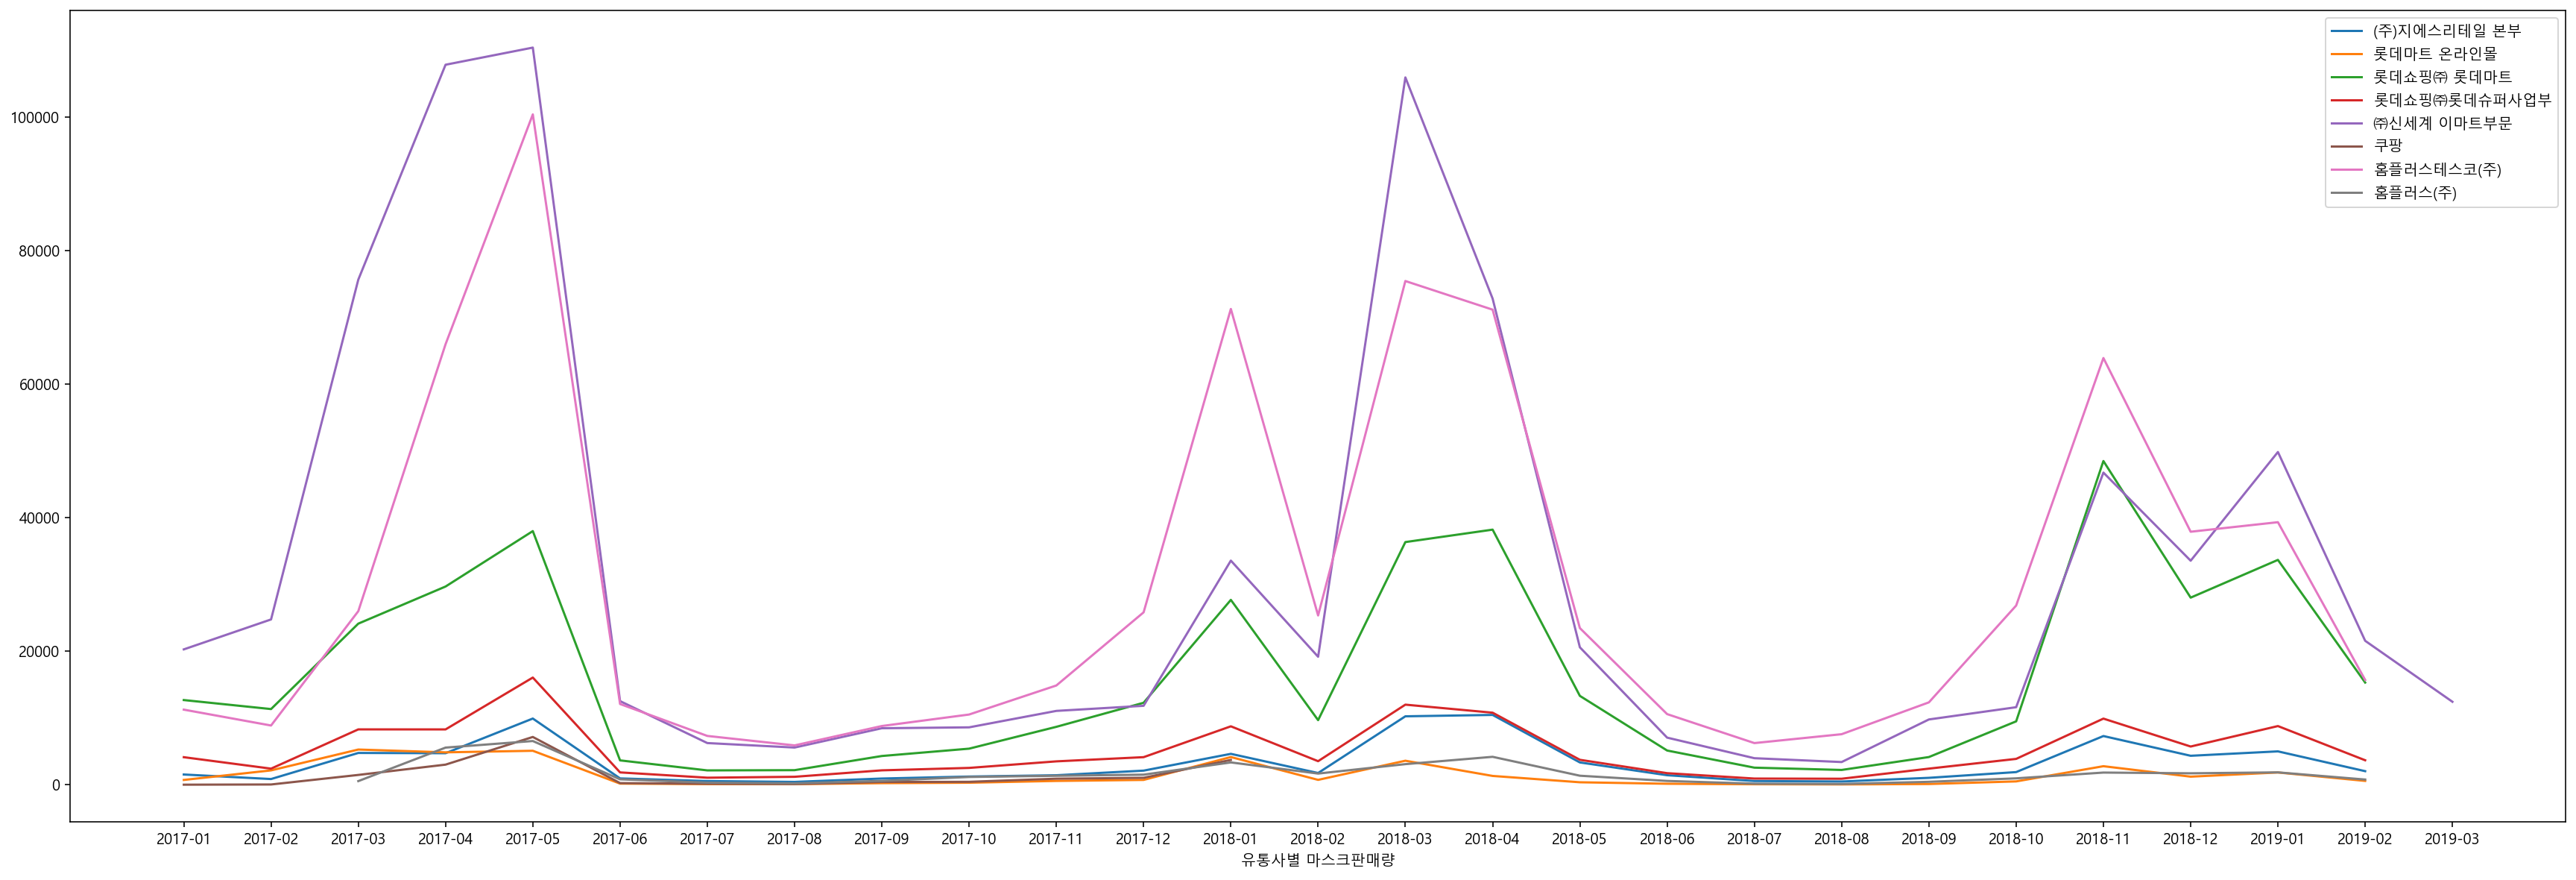

In [ ]:
plt.figure(figsize = (30, 10))

for customer in customer_list:
    df = cust_pos[cust_pos['CUSTOMER NAME'] == customer]
    x = df['Calendar Day일 2'].to_list()
    # xlabels = df['Calendar Day일 2'].apply(lambda x: x[0:7]).to_list()
    y = df['Sales (Bag)'].to_list()
    plt.legend()
    plt.plot(x, y, label =customer)
    # plt.xticks(ticks=x, labels=xlabels, rotation=45)
    plt.xlabel('유통사별 마스크판매량')
    # plt.locator_params(axis='x') # nbins=len(xlabels)/35

Text(0.5, 0, '마스크판매량')

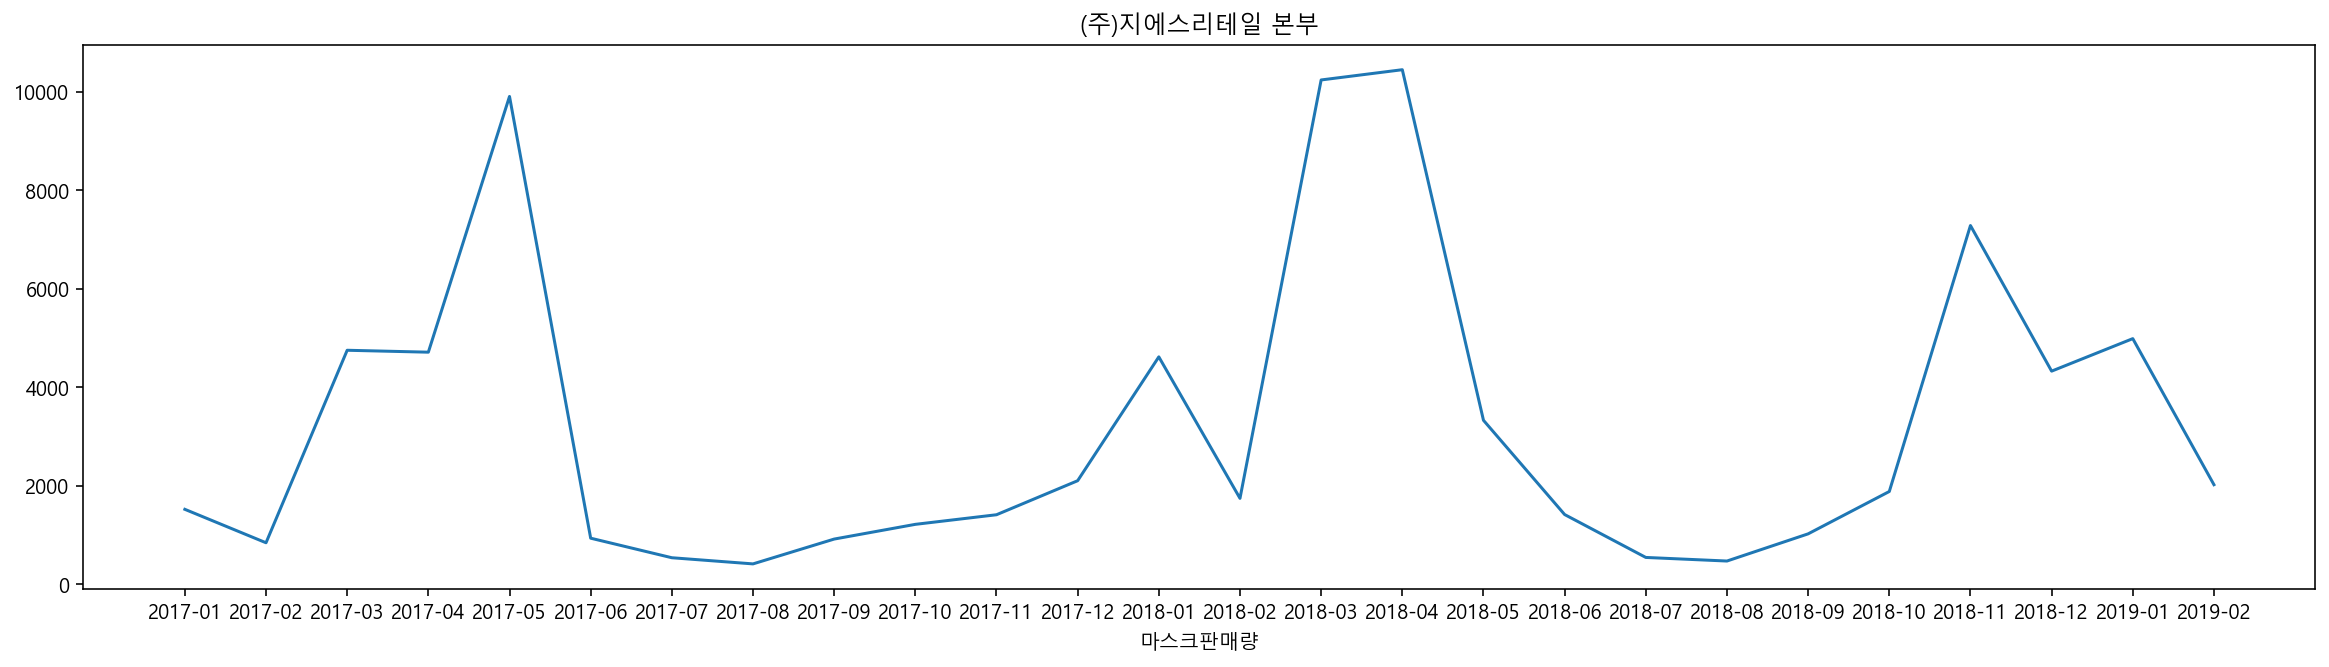

In [ ]:
# customer_list = ['(주)지에스리테일 본부', '롯데마트 온라인몰', '롯데쇼핑㈜ 롯데마트', '롯데쇼핑㈜롯데슈퍼사업부', '㈜신세계 이마트부문', '쿠팡', '홈플러스테스코(주)', '홈플러스(주)', '씨에스유통㈜']
plt.figure(figsize = (20, 5))
df = cust_pos[cust_pos['CUSTOMER NAME'] == '(주)지에스리테일 본부']
x = df['Calendar Day일 2'].to_list()
# xlabels = df['Calendar Day일 2'].apply(lambda x: x[0:7]).to_list()
y = df['Sales (Bag)'].to_list()
plt.title('(주)지에스리테일 본부')
plt.plot(x, y)
# plt.xticks(ticks=x, labels=xlabels, rotation=45)
plt.xlabel('마스크판매량')
# plt.locator_params(axis='x') # nbins=len(xlabels)/35

Text(0.5, 0, '마스크판매량')

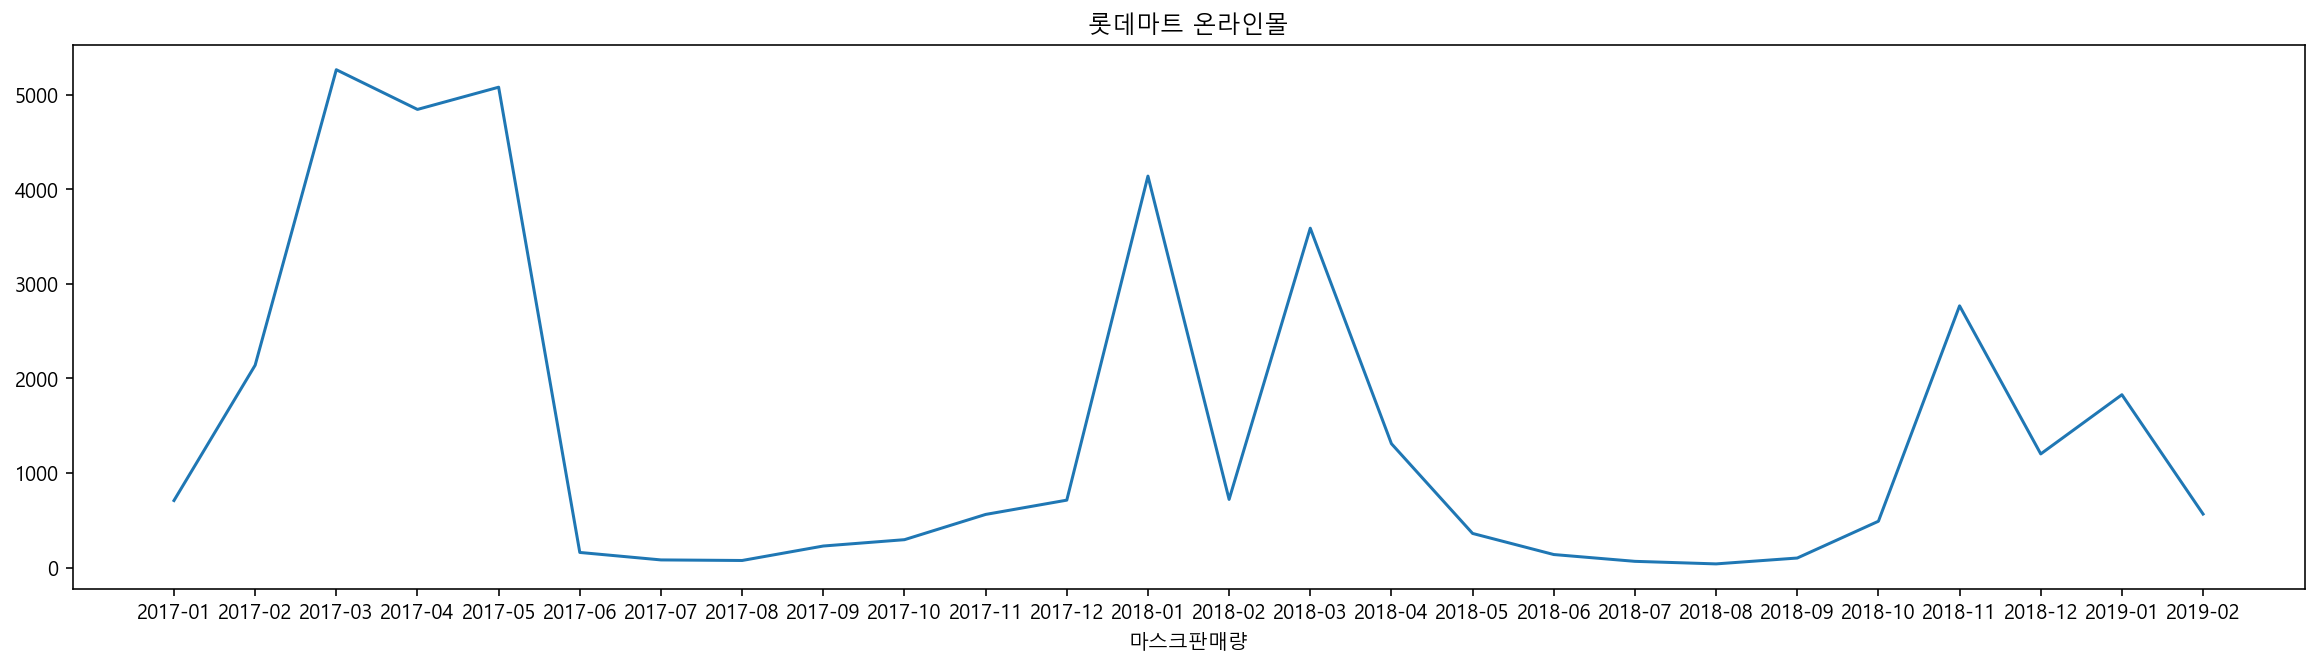

In [ ]:
# customer_list = ['(주)지에스리테일 본부', '롯데마트 온라인몰', '롯데쇼핑㈜ 롯데마트', '롯데쇼핑㈜롯데슈퍼사업부', '㈜신세계 이마트부문', '쿠팡', '홈플러스테스코(주)', '홈플러스(주)', '씨에스유통㈜']
plt.figure(figsize = (20, 5))
df = cust_pos[cust_pos['CUSTOMER NAME'] == '롯데마트 온라인몰']
x = df['Calendar Day일 2'].to_list()
# xlabels = df['Calendar Day일 2'].apply(lambda x: x[0:7]).to_list()
y = df['Sales (Bag)'].to_list()
plt.title('롯데마트 온라인몰')
plt.plot(x, y)
# plt.xticks(ticks=x, labels=xlabels, rotation=45)
plt.xlabel('마스크판매량')
# plt.locator_params(axis='x') # nbins=len(xlabels)/35

Text(0.5, 0, '마스크판매량')

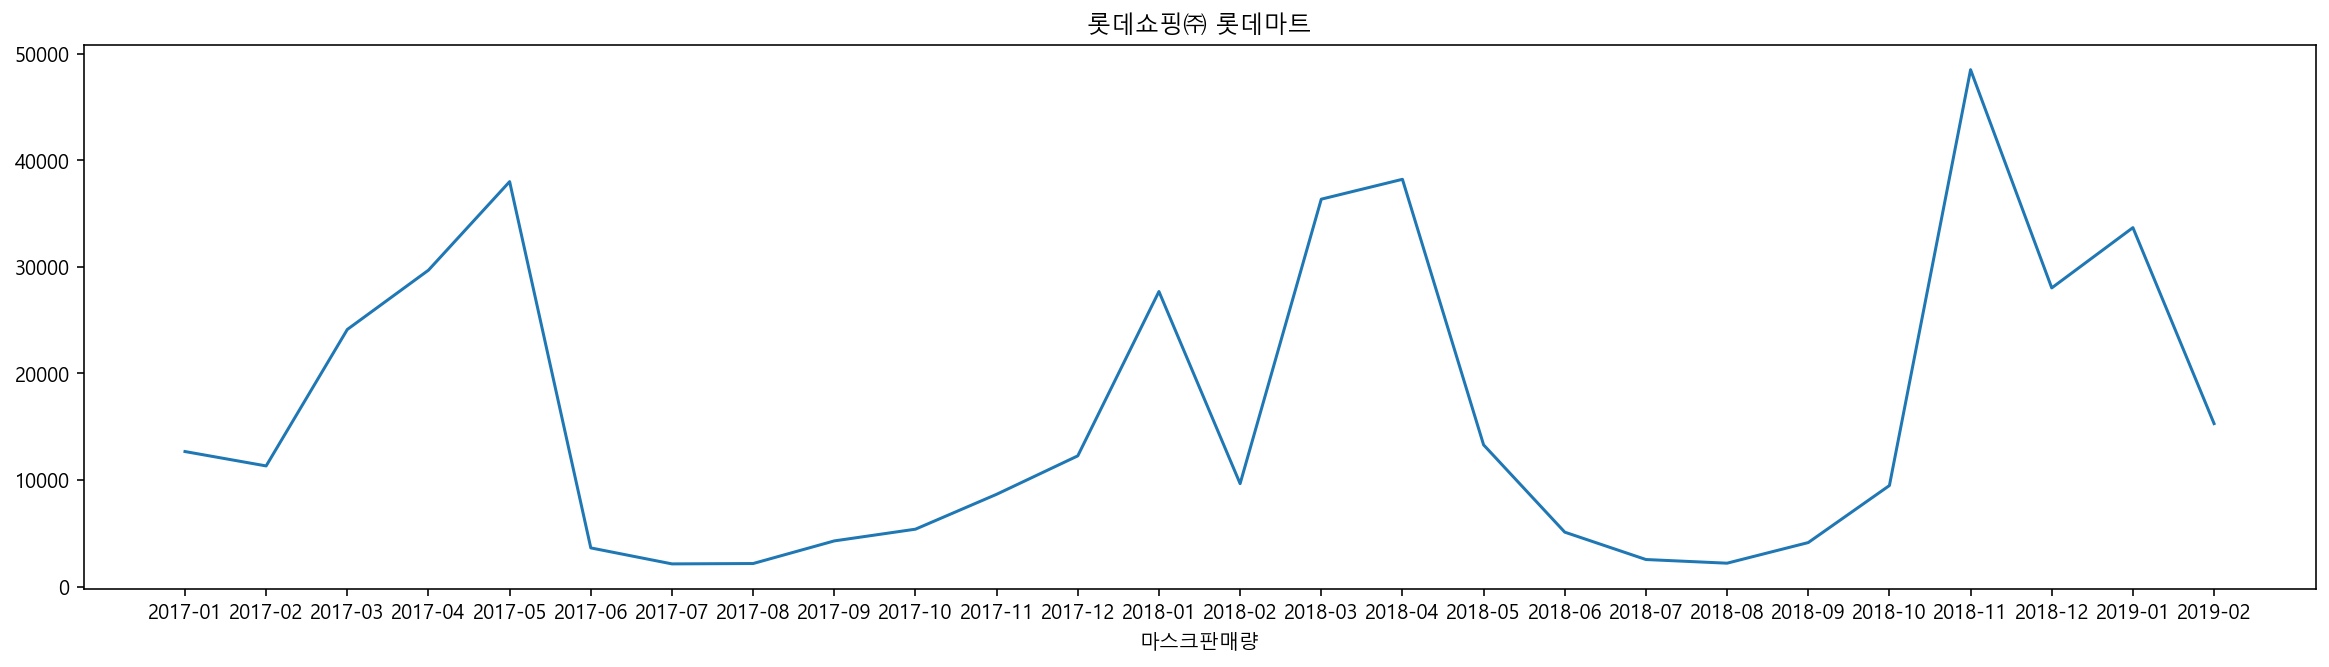

In [ ]:
# customer_list = ['(주)지에스리테일 본부', '롯데마트 온라인몰', '롯데쇼핑㈜ 롯데마트', '롯데쇼핑㈜롯데슈퍼사업부', '㈜신세계 이마트부문', '쿠팡', '홈플러스테스코(주)', '홈플러스(주)', '씨에스유통㈜']
plt.figure(figsize = (20, 5))
df = cust_pos[cust_pos['CUSTOMER NAME'] == '롯데쇼핑㈜ 롯데마트']
x = df['Calendar Day일 2'].to_list()
# xlabels = df['Calendar Day일 2'].apply(lambda x: x[0:7]).to_list()
y = df['Sales (Bag)'].to_list()
plt.title('롯데쇼핑㈜ 롯데마트')
plt.plot(x, y)
# plt.xticks(ticks=x, labels=xlabels, rotation=45)
plt.xlabel('마스크판매량')
# plt.locator_params(axis='x') # nbins=len(xlabels)/35

Text(0.5, 0, '마스크판매량')

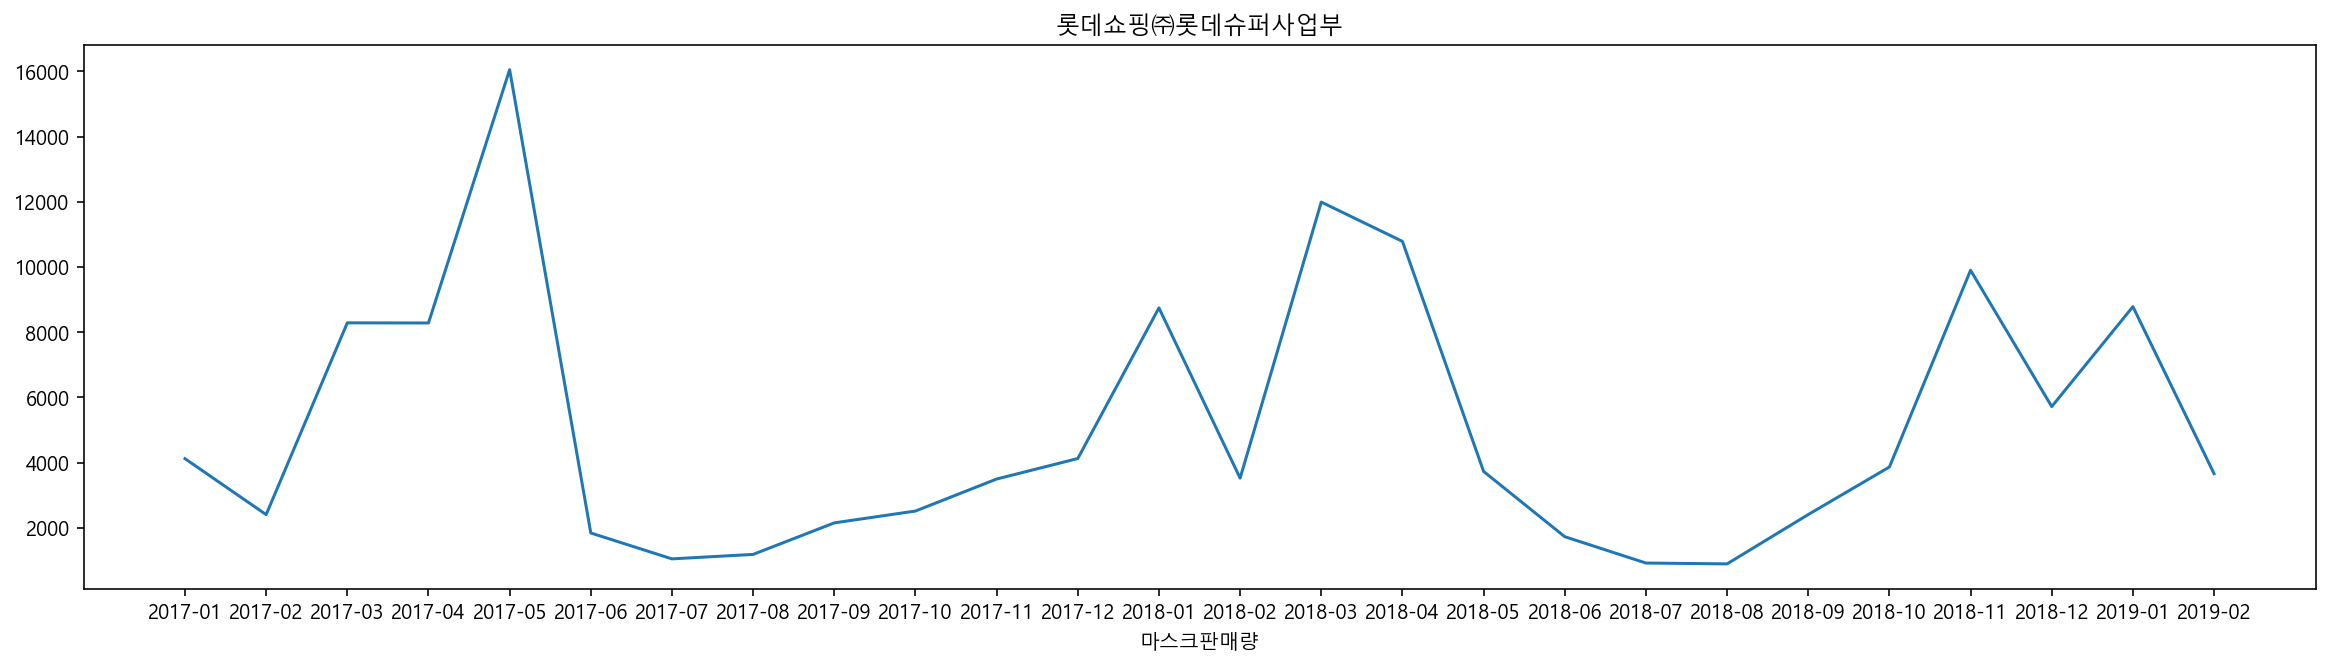

In [ ]:
# customer_list = ['(주)지에스리테일 본부', '롯데마트 온라인몰', '롯데쇼핑㈜ 롯데마트', '롯데쇼핑㈜롯데슈퍼사업부', '㈜신세계 이마트부문', '쿠팡', '홈플러스테스코(주)', '홈플러스(주)', '씨에스유통㈜']
plt.figure(figsize = (20, 5))
df = cust_pos[cust_pos['CUSTOMER NAME'] == '롯데쇼핑㈜롯데슈퍼사업부']
x = df['Calendar Day일 2'].to_list()
# xlabels = df['Calendar Day일 2'].apply(lambda x: x[0:7]).to_list()
y = df['Sales (Bag)'].to_list()
plt.title('롯데쇼핑㈜롯데슈퍼사업부')

plt.plot(x, y)
# plt.xticks(ticks=x, labels=xlabels, rotation=45)
plt.xlabel('마스크판매량')
# plt.locator_params(axis='x') # nbins=len(xlabels)/35

Text(0.5, 0, '마스크판매량')

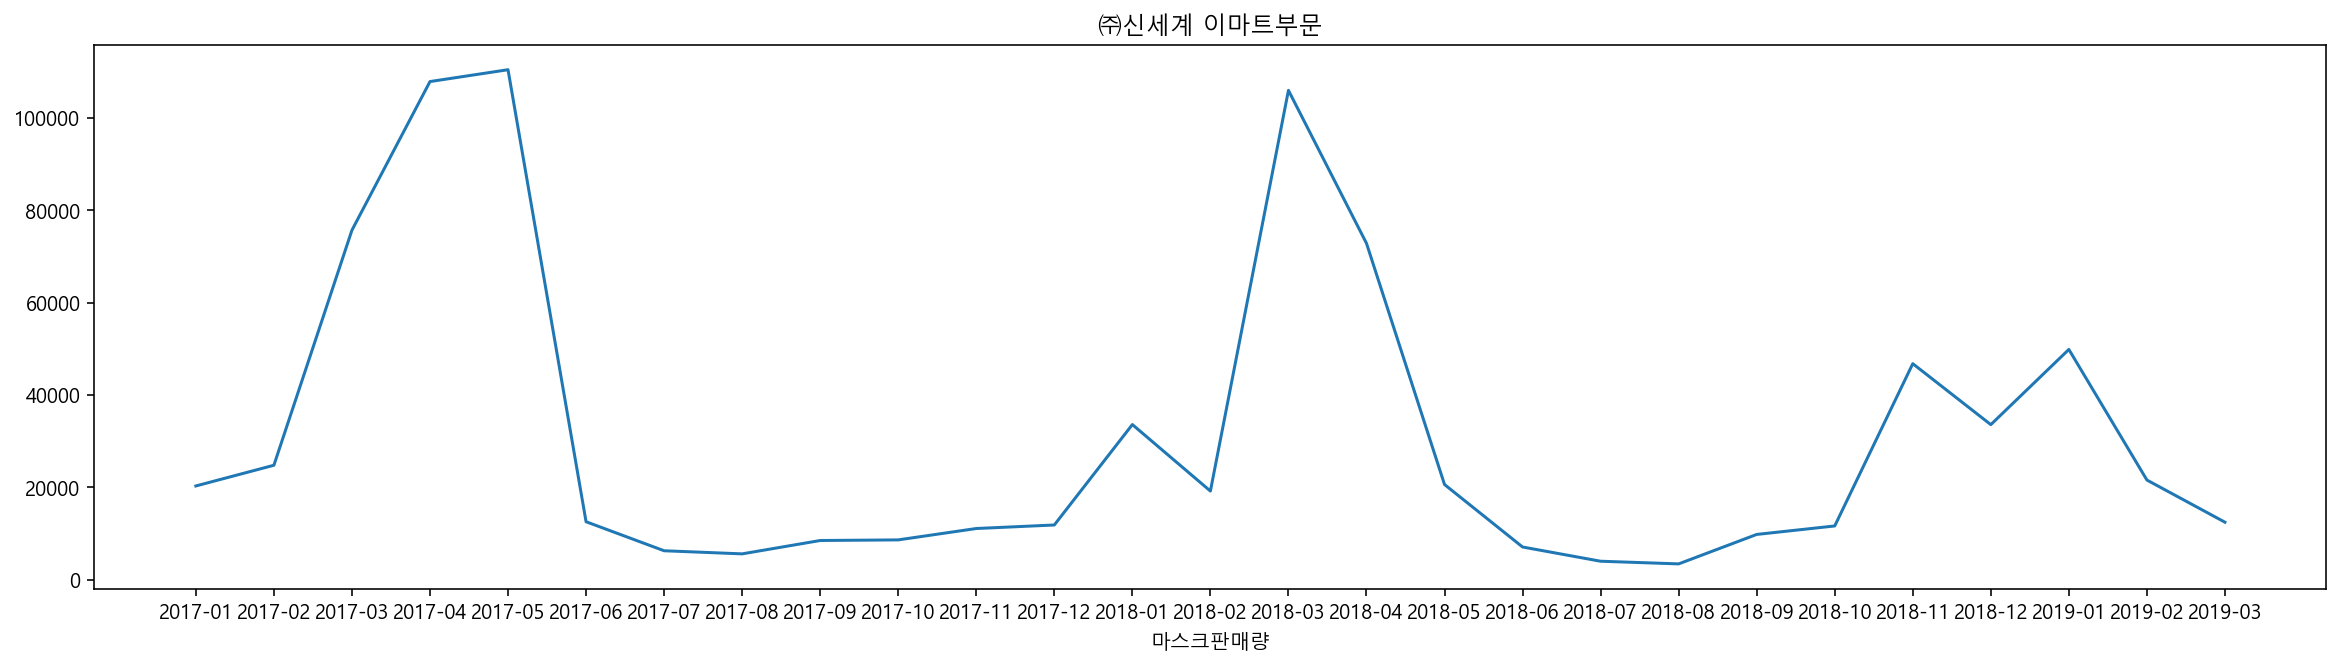

In [ ]:
# customer_list = ['(주)지에스리테일 본부', '롯데마트 온라인몰', '롯데쇼핑㈜ 롯데마트', '롯데쇼핑㈜롯데슈퍼사업부', '㈜신세계 이마트부문', '쿠팡', '홈플러스테스코(주)', '홈플러스(주)', '씨에스유통㈜']
plt.figure(figsize = (20, 5))
df = cust_pos[cust_pos['CUSTOMER NAME'] == '㈜신세계 이마트부문']
x = df['Calendar Day일 2'].to_list()
# xlabels = df['Calendar Day일 2'].apply(lambda x: x[0:7]).to_list()
y = df['Sales (Bag)'].to_list()
plt.title('㈜신세계 이마트부문')

plt.plot(x, y)
# plt.xticks(ticks=x, labels=xlabels, rotation=45)
plt.xlabel('마스크판매량')
# plt.locator_params(axis='x') # nbins=len(xlabels)/35

Text(0.5, 0, '마스크판매량')

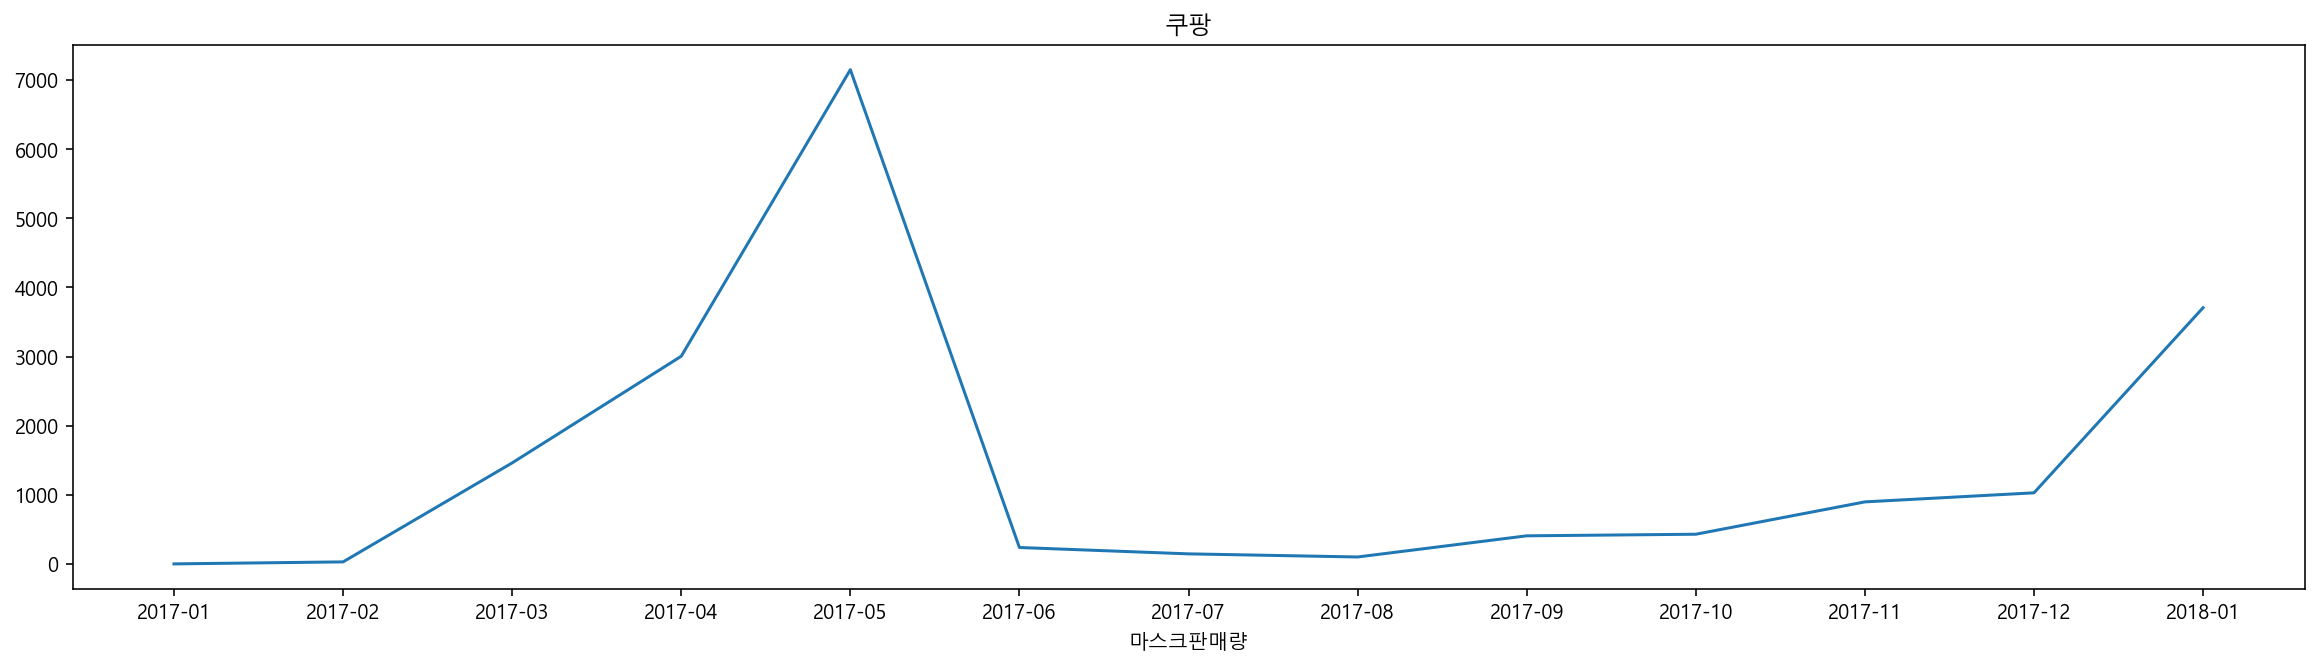

In [ ]:
# customer_list = ['(주)지에스리테일 본부', '롯데마트 온라인몰', '롯데쇼핑㈜ 롯데마트', '롯데쇼핑㈜롯데슈퍼사업부', '㈜신세계 이마트부문', '쿠팡', '홈플러스테스코(주)', '홈플러스(주)', '씨에스유통㈜']
plt.figure(figsize = (20, 5))
df = cust_pos[cust_pos['CUSTOMER NAME'] == '쿠팡']
x = df['Calendar Day일 2'].to_list()
# xlabels = df['Calendar Day일 2'].apply(lambda x: x[0:7]).to_list()
y = df['Sales (Bag)'].to_list()
plt.title('쿠팡')

plt.plot(x, y)
# plt.xticks(ticks=x, labels=xlabels, rotation=45)
plt.xlabel('마스크판매량')
# plt.locator_params(axis='x') # nbins=len(xlabels)/35

Text(0.5, 0, '마스크판매량')

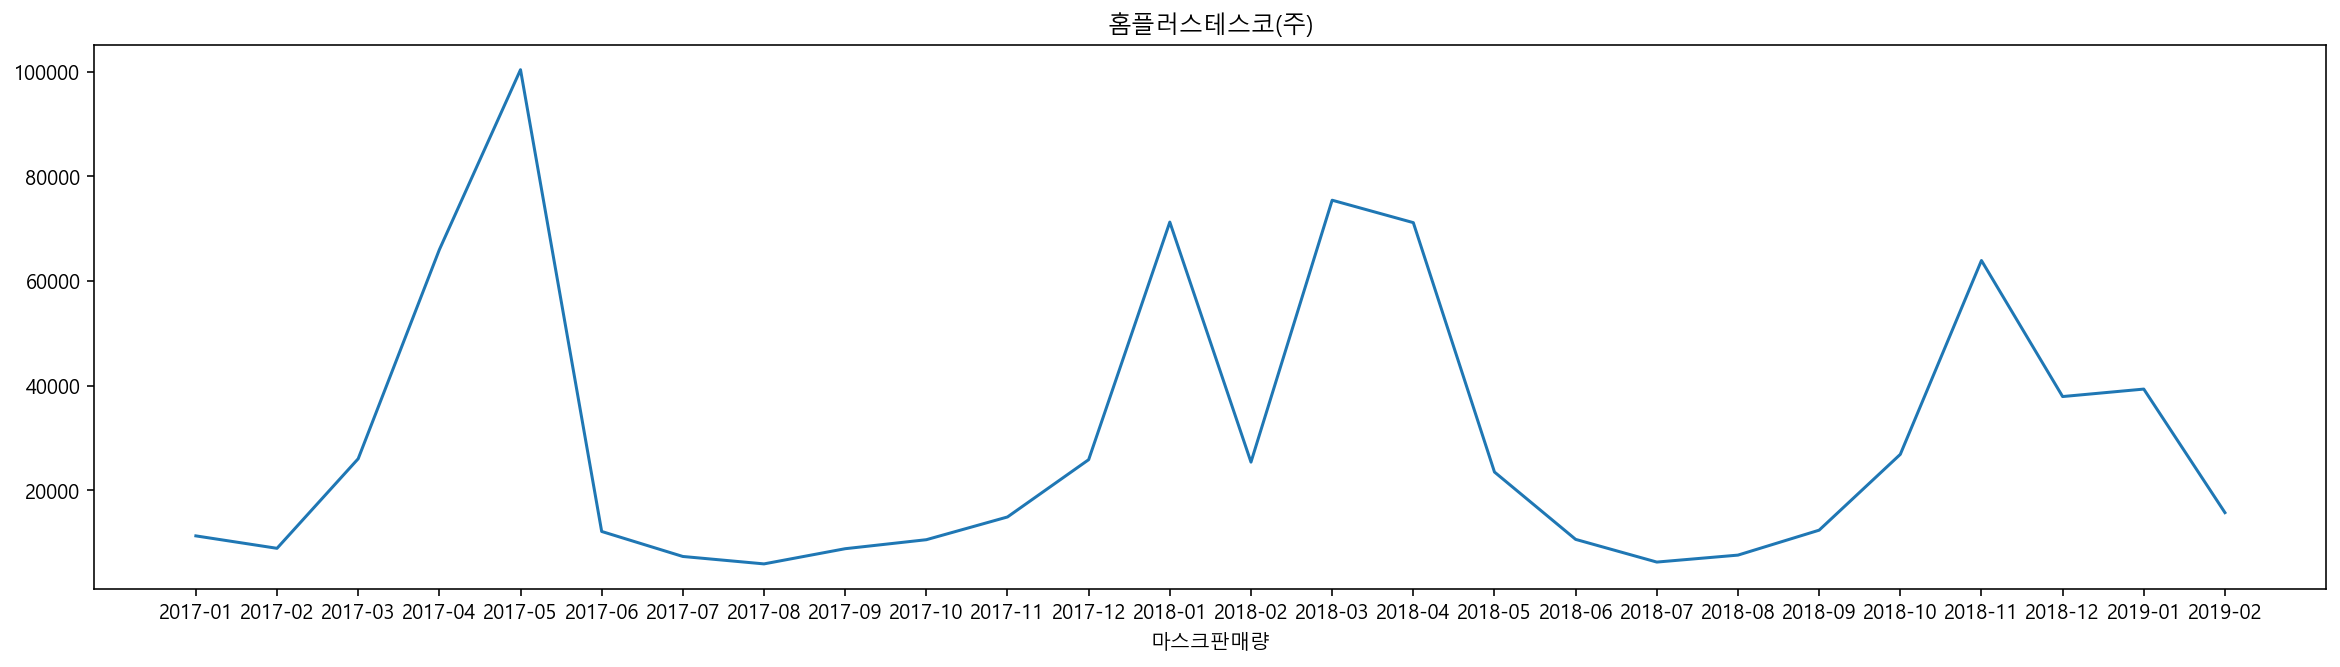

In [ ]:
# customer_list = ['(주)지에스리테일 본부', '롯데마트 온라인몰', '롯데쇼핑㈜ 롯데마트', '롯데쇼핑㈜롯데슈퍼사업부', '㈜신세계 이마트부문', '쿠팡', '홈플러스테스코(주)', '홈플러스(주)', '씨에스유통㈜']
plt.figure(figsize = (20, 5))
df = cust_pos[cust_pos['CUSTOMER NAME'] == '홈플러스테스코(주)']
x = df['Calendar Day일 2'].to_list()
# xlabels = df['Calendar Day일 2'].apply(lambda x: x[0:7]).to_list()
y = df['Sales (Bag)'].to_list()
plt.title('홈플러스테스코(주)')

plt.plot(x, y)
# plt.xticks(ticks=x, labels=xlabels, rotation=45)
plt.xlabel('마스크판매량')
# plt.locator_params(axis='x') # nbins=len(xlabels)/35

Text(0.5, 0, '마스크판매량')

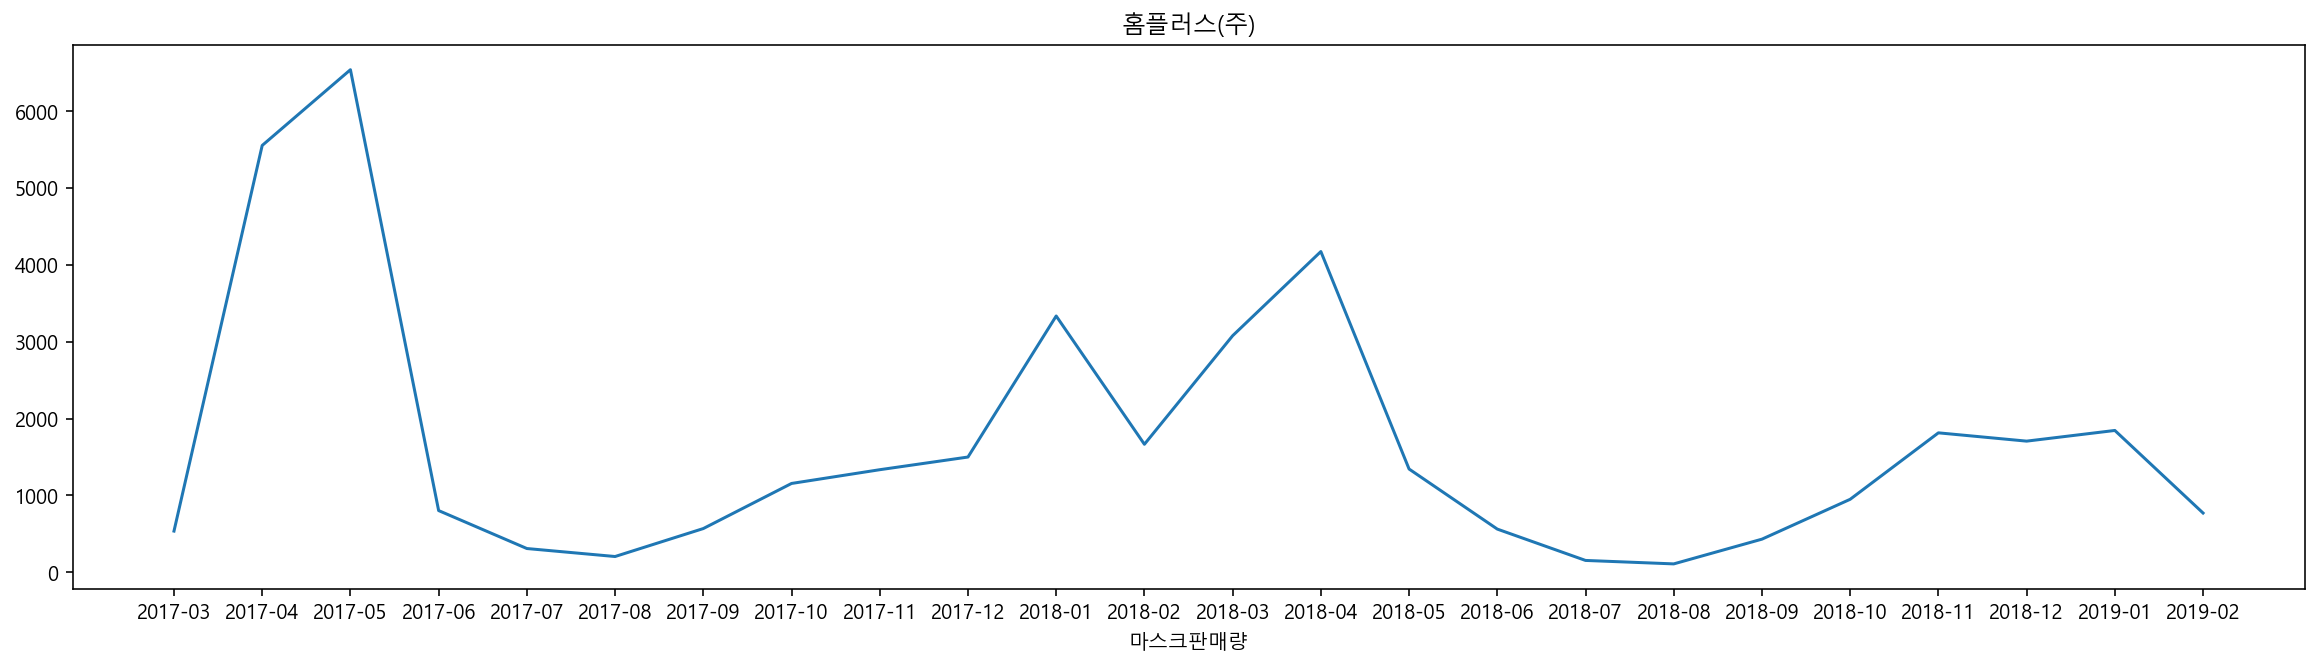

In [ ]:
# customer_list = ['(주)지에스리테일 본부', '롯데마트 온라인몰', '롯데쇼핑㈜ 롯데마트', '롯데쇼핑㈜롯데슈퍼사업부', '㈜신세계 이마트부문', '쿠팡', '홈플러스테스코(주)', '홈플러스(주)', '씨에스유통㈜']
plt.figure(figsize = (20, 5))
df = cust_pos[cust_pos['CUSTOMER NAME'] == '홈플러스(주)']
x = df['Calendar Day일 2'].to_list()
# xlabels = df['Calendar Day일 2'].apply(lambda x: x[0:7]).to_list()
y = df['Sales (Bag)'].to_list()
plt.title('홈플러스(주)')

plt.plot(x, y)
# plt.xticks(ticks=x, labels=xlabels, rotation=45)
plt.xlabel('마스크판매량')
# plt.locator_params(axis='x') # nbins=len(xlabels)/35

Text(0.5, 0, '마스크판매량')

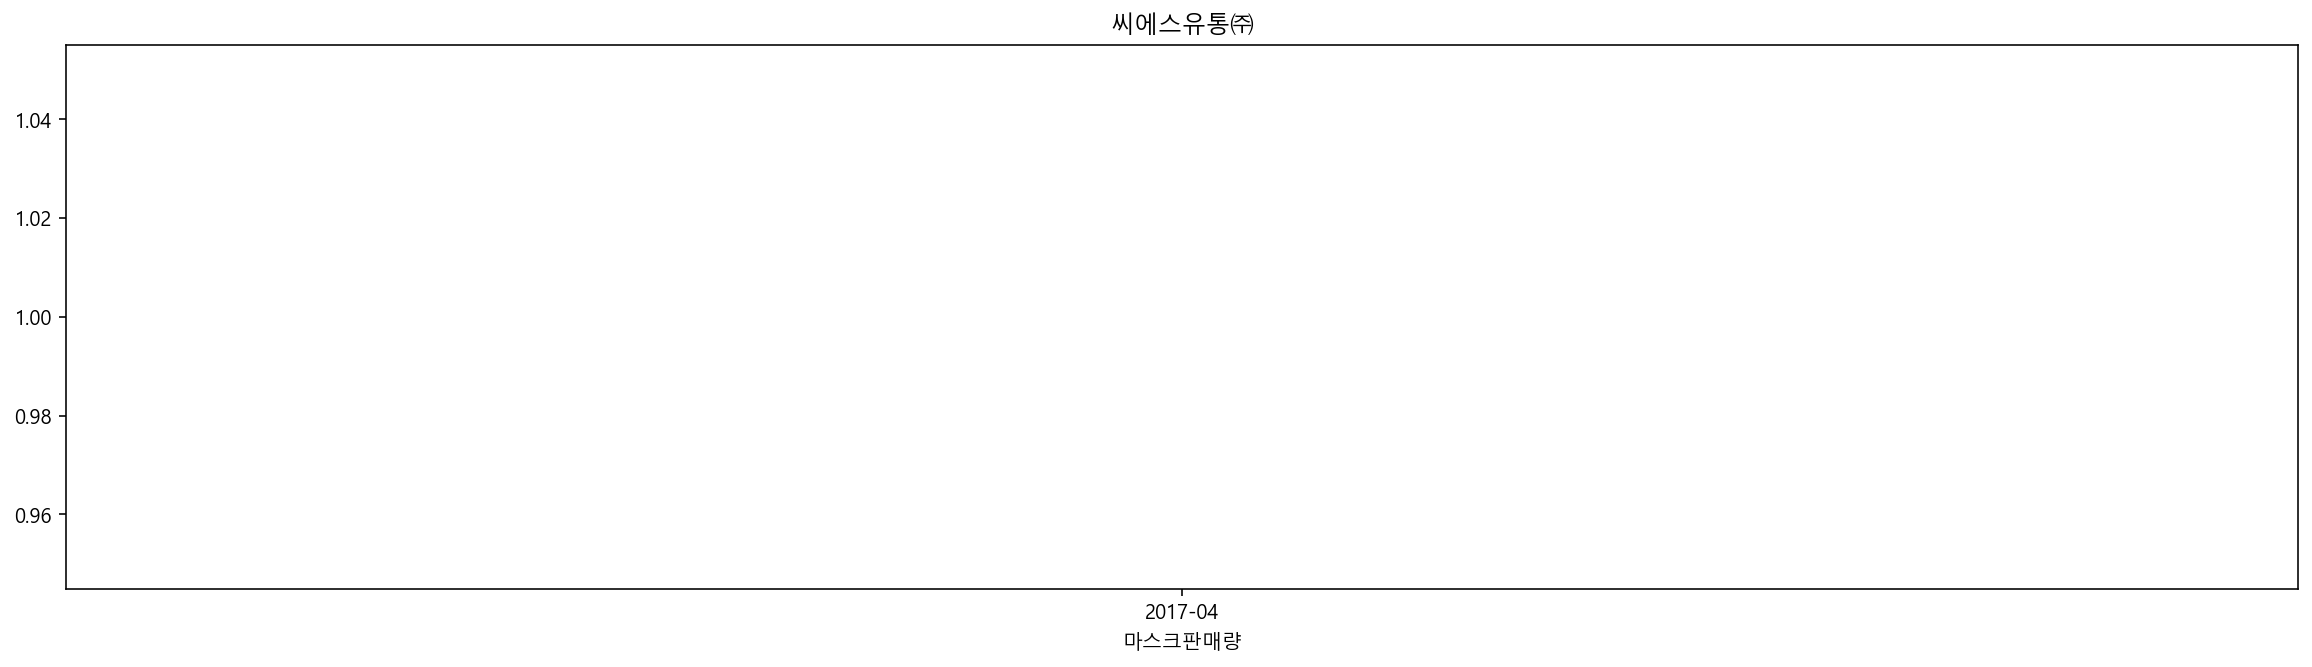

In [ ]:
# customer_list = ['(주)지에스리테일 본부', '롯데마트 온라인몰', '롯데쇼핑㈜ 롯데마트', '롯데쇼핑㈜롯데슈퍼사업부', '㈜신세계 이마트부문', '쿠팡', '홈플러스테스코(주)', '홈플러스(주)', '씨에스유통㈜']
plt.figure(figsize = (20, 5))
df = cust_pos[cust_pos['CUSTOMER NAME'] == '씨에스유통㈜']
x = df['Calendar Day일 2'].to_list()
# xlabels = df['Calendar Day일 2'].apply(lambda x: x[0:7]).to_list()
y = df['Sales (Bag)'].to_list()
plt.title('씨에스유통㈜')

plt.plot(x, y)
# plt.xticks(ticks=x, labels=xlabels, rotation=45)
plt.xlabel('마스크판매량')
# plt.locator_params(axis='x') # nbins=len(xlabels)/35

In [ ]:
cust_pos[cust_pos['CUSTOMER NAME'] == '씨에스유통㈜']

,CUSTOMER NAME,Calendar Day일 2,Sales (Bag)
131,씨에스유통㈜,2017-04,1
